In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path

In [4]:
path = Path("../../TRAIN_DATA/Words_2/train")

label_paths = list(path.glob("labels/*.txt"))
image_paths = list(path.glob("images/*")) # map(lambda x: x.as_posix().replace("labels", "images").replace(".txt", ".jpeg"), label_paths)

In [5]:
def load_data(idx):
    global label_paths, image_paths
    
    with open(label_paths[idx],"r") as f:
        polygon_labels = f.readlines()
        
    segments = []
    for label in polygon_labels:
        segments.append(np.array(list(map(lambda x: float(x), label.split(None)[1:]))))
        
    img = plt.imread(image_paths[idx])
    return segments, img

def rescale(segments, img_width, img_height):
    for i in range(len(segments)):
        segments[i][::2] *= img_width
        segments[i][1::2] *= img_height
        segments[i] = segments[i].astype(np.int32)
    
    return segments

def plot(img, polygons):
    polygons = rescale(polygons, img.shape[1], img.shape[0])
    # shape for `fillPoly`
    for polygon in polygons:
        polygon = polygon.reshape((-1, 2)).astype(np.int32)
        cv2.fillPoly(img, [polygon], (200, 0, 0))
    
    return img

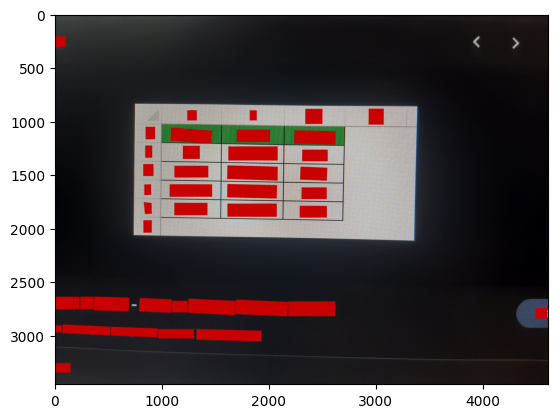

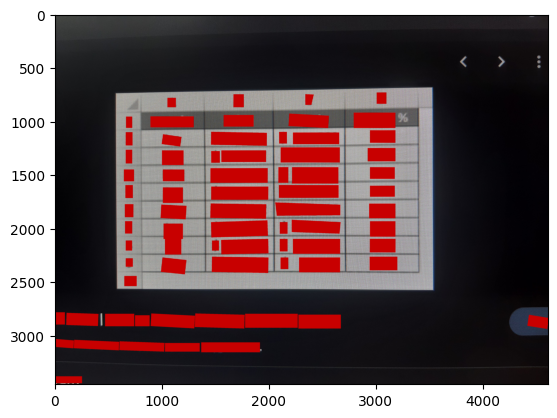

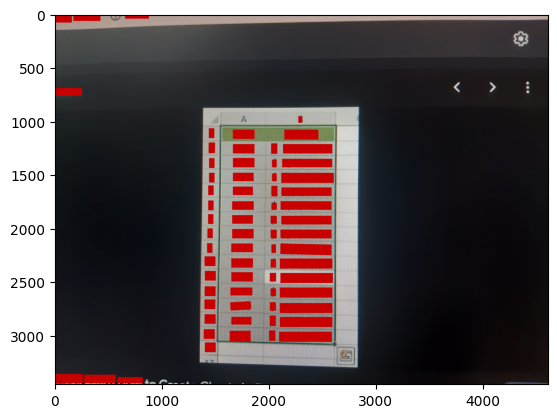

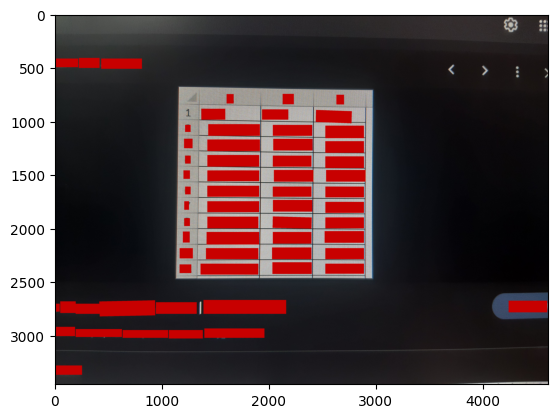

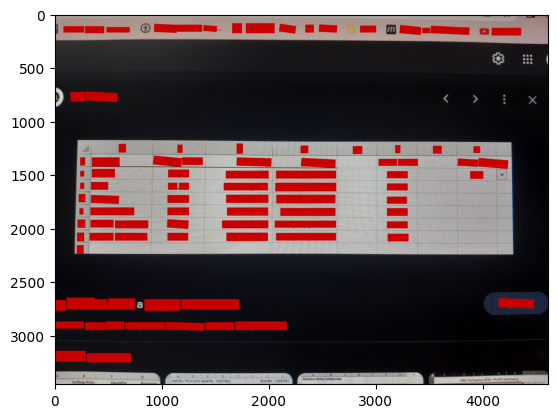

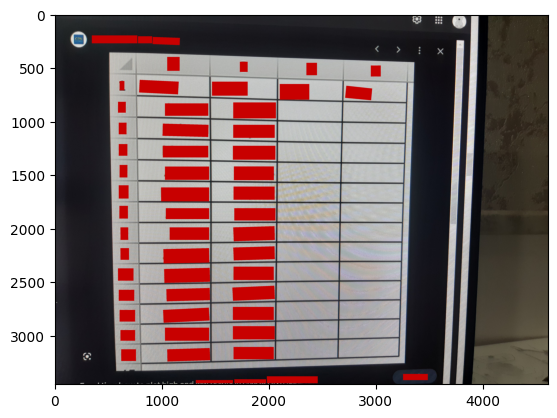

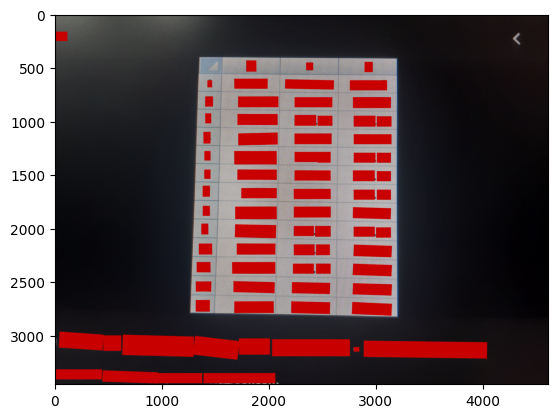

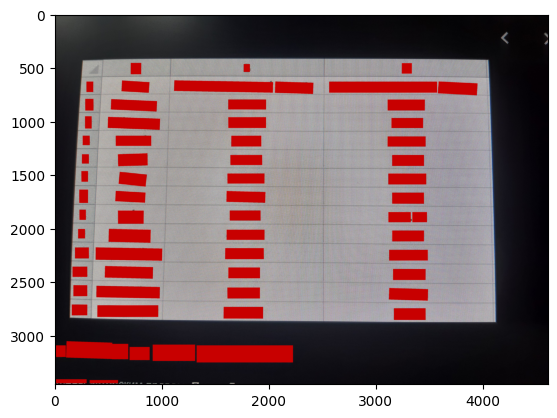

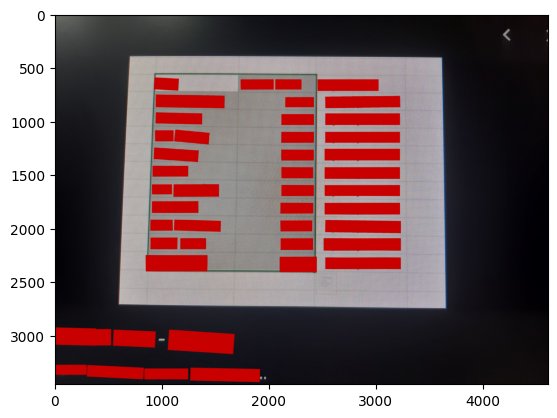

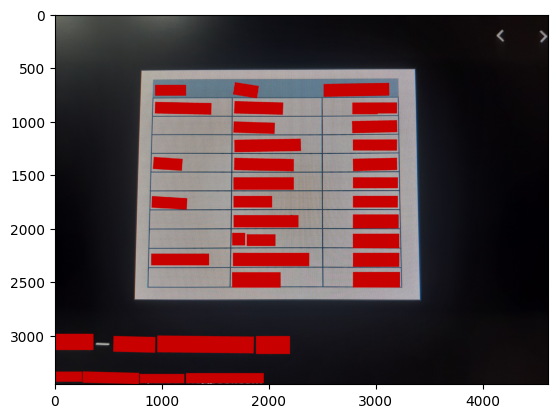

In [6]:
for i in range(-10,-20,-1):
    polygons, img = load_data(i)
    img = plot(img, polygons)
    # Draw filled polygon on image
    plt.imshow(img)
    plt.show()